## UAS

1. DATA UNDERSTANDING

  Dataset yang digunakan dalam analisis ini adalah Breast Cancer Wisconsin (Original) yang berasal dari UCI Machine Learning Repository. Dataset ini berisi hasil observasi sitologi sel payudara yang dikumpulkan untuk membantu diagnosis kanker payudara, apakah bersifat jinak (benign) atau ganas (malignant).

  Terdapat total 699 sampel pada dataset ini, dengan masing-masing sampel direpresentasikan oleh 9 fitur numerik hasil pemeriksaan mikroskopis. Fitur-fitur tersebut adalah Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, dan Mitoses. Semua fitur memiliki rentang nilai antara 1 hingga 10, di mana nilai yang lebih tinggi umumnya menunjukkan potensi abnormalitas sel yang lebih besar.

  Selain itu, terdapat satu kolom target yaitu Class, yang merepresentasikan hasil diagnosis medis. Kelas 2 menunjukkan kondisi benign (tidak berbahaya), sedangkan kelas 4 menunjukkan kondisi malignant (berbahaya atau kanker ganas). Dataset ini bersifat multivariate dan bertujuan untuk menyelesaikan masalah klasifikasi biner.

In [1]:
pip install ucimlrepo


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

fitur-fitur yang ada di dalam dataset:

1. clump thickness: ketebalan kelompok sel, semakin tebal, kemungkinan besar adalah kanker
2. uniformity of cell size: tingkat keseragaman ukuran sel, sel kaknker biasanya ukurannya tidak seragam
3. uniformity of cell shape: tingkat keseragaman bentuk sel, sel abnormal cenderung memiliki bentuk beragam
4. marginal adhesion: kemampuan sel untuk saling menempel, sel kanker cenderung kurang melekat
5. single epithelial cell size: ukuran sel epitel tunggal, sel kaknker biasanya memebesar tidak normal
6. bare nuclei: jumlah inti sel yang tidak tertutuo, nilai tinggi menunjukkan abnormalitas
7. bland chromatin: tingkat halus atau tidaknya kromatin dalam inti sel, kromatin kasar biasanya tanda kanker
8. normal nucleoli: jumlah/nilai nucleoli (struktur dalam inti sel), jumlah banyak atau tidak normal bisa indikasi kanker
9. mitoses: tingkatan pembelahan sel, jika tinggi menunjukan pertumbuhan el yang agresif, indikasi kanker
10. class: target prediksi, 2 untuk jikan dan 4 untuk ganas

2. PREPROCESSING

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load Data
url = "https://archive.ics.uci.edu/static/public/15/data.csv"
data = pd.read_csv(url)

print(f"Jumlah total data: {data.shape[0]} sampel")
print(f"Jumlah total fitur (termasuk ID & target): {data.shape[1]} kolom\n")

# 2. Drop Kolom ID
data.drop(columns=["Sample_code_number"], inplace=True)
print("Kolom 'Sample_code_number' (ID) dihapus karena tidak relevan untuk prediksi.\n")

# 3. Tangani Missing Value di Bare Nuclei
data["Bare_nuclei"].replace("?", pd.NA, inplace=True)
data["Bare_nuclei"] = pd.to_numeric(data["Bare_nuclei"])
missing_before = data["Bare_nuclei"].isna().sum()

# Imputasi dengan median
median_bare_nuclei = data["Bare_nuclei"].median()
data["Bare_nuclei"].fillna(median_bare_nuclei, inplace=True)
missing_after = data["Bare_nuclei"].isna().sum()

print(f"Jumlah missing value di 'Bare_nuclei' sebelum imputasi: {missing_before}")
print(f"Jumlah missing value di 'Bare_nuclei' setelah imputasi: {missing_after}\n")

# 4. Konversi Target Class
data["Class"] = data["Class"].map({2: 0, 4: 1})
print("Target 'Class' dikonversi:\n- 0 = Benign (Tidak Berbahaya)\n- 1 = Malignant (Kanker Ganas)\n")

# 5. Distribusi Kelas
class_counts = data["Class"].value_counts()
print("Distribusi Kelas setelah Preprocessing:")
print(f"- Benign (0)   : {class_counts[0]} sampel")
print(f"- Malignant (1): {class_counts[1]} sampel\n")

# 6. Split Data
X = data.drop(columns=["Class"])
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ukuran Data Training : {X_train.shape[0]} sampel, {X_train.shape[1]} fitur per sampel")
print(f"Ukuran Data Testing  : {X_test.shape[0]} sampel, {X_test.shape[1]} fitur per sampel\n")

# 7. Standarisasi Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Semua fitur numerik telah distandarisasi menggunakan StandardScaler.\n")


Jumlah total data: 699 sampel
Jumlah total fitur (termasuk ID & target): 11 kolom

Kolom 'Sample_code_number' (ID) dihapus karena tidak relevan untuk prediksi.

Jumlah missing value di 'Bare_nuclei' sebelum imputasi: 16
Jumlah missing value di 'Bare_nuclei' setelah imputasi: 0

Target 'Class' dikonversi:
- 0 = Benign (Tidak Berbahaya)
- 1 = Malignant (Kanker Ganas)

Distribusi Kelas setelah Preprocessing:
- Benign (0)   : 458 sampel
- Malignant (1): 241 sampel

Ukuran Data Training : 559 sampel, 9 fitur per sampel
Ukuran Data Testing  : 140 sampel, 9 fitur per sampel

Semua fitur numerik telah distandarisasi menggunakan StandardScaler.



Pada tahap preprocessing dataset Breast Cancer Wisconsin (Original), langkah pertama adalah membersihkan dan mempersiapkan data agar layak digunakan untuk pemodelan. Dataset ini berisi 699 sampel dengan 11 kolom, di mana salah satu kolom yaitu Sample_code_number merupakan ID unik yang tidak memiliki kontribusi terhadap proses prediksi, sehingga kolom tersebut dihapus. Selanjutnya ditemukan adanya missing value pada kolom Bare_nuclei yang ditandai dengan simbol tanda tanya (?). Kolom tersebut dikonversi ke format numerik dan missing value diisinya menggunakan median agar distribusi data tetap stabil dan tidak terpengaruh outlier.



Setelah proses pembersihan, target pada kolom Class yang awalnya berupa angka 2 untuk kasus benign (tidak berbahaya) dan 4 untuk kasus malignant (kanker ganas) dikonversi menjadi nilai biner yaitu 0 untuk benign dan 1 untuk malignant agar lebih sesuai digunakan pada model klasifikasi. Distribusi kelas setelah pembersihan menunjukkan adanya 458 sampel benign dan 241 sampel malignant, sehingga dataset cukup seimbang untuk proses modelling. Pembagian data kemudian dilakukan menggunakan metode stratified split agar proporsi kelas tetap terjaga di data training dan testing.

Data dibagi menjadi 80% untuk training sebanyak 559 sampel dan 20% untuk testing sebanyak 140 sampel. Seluruh fitur numerik kemudian distandarisasi menggunakan StandardScaler agar memiliki rata-rata 0 dan standar deviasi 1, terutama untuk mengoptimalkan kinerja model yang sensitif terhadap skala seperti logistic regression atau SVM. Dengan selesainya tahap ini, dataset sudah bersih, siap pakai, dan seluruh fitur berada dalam format dan skala yang optimal untuk dilanjutkan ke tahap modelling.



3. MODELLING

LOGISTIC REGRESSION


==== Logistic Regression ====
Inisialisasi model Logistic Regression (mencari garis/hiperplane pemisah linear)...
Melatih model dengan data training...

Melakukan prediksi terhadap data testing...
Hasil prediksi:
[1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]

Data aktual:
[1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0]

Menghitung Confusion Matrix...
Confusion Matrix:
[[90  2]
 [ 5 43]]

Total data uji: 140
Prediksi benar : 133
Prediksi salah : 7

Perhitungan Akurasi:
Akurasi = (Prediksi Benar / Total Data) x 100
Akur

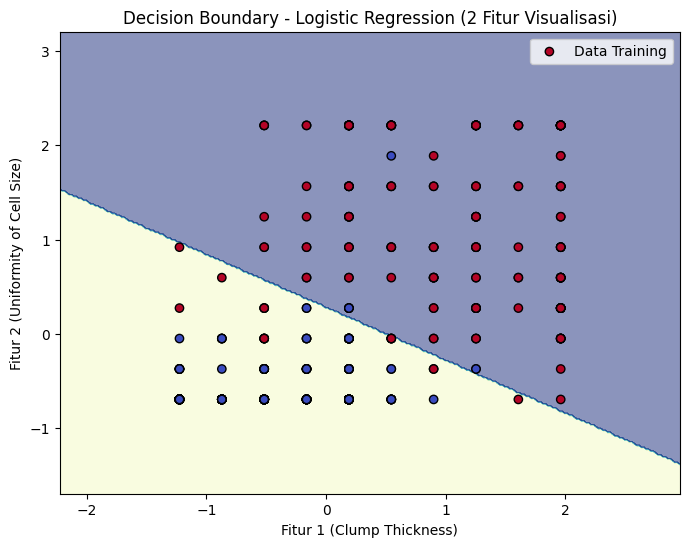


Visualisasi Confusion Matrix dengan Persentase...


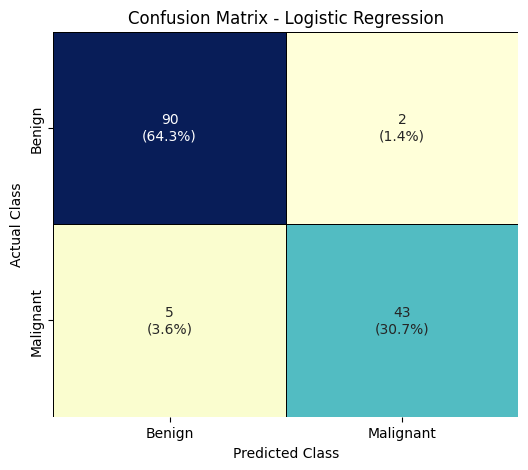


==== RANGKUMAN AKHIR Logistic Regression ====
Akurasi   : 95.00%
Precision : 95.56%
Recall    : 89.58%
F1-Score  : 92.47%


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Ambil 2 fitur untuk visualisasi decision boundary
X_vis = X_train_scaled[:, [0, 1]]  # contoh 2 fitur pertama
X_test_vis = X_test_scaled[:, [0, 1]]

print("\n==== Logistic Regression ====")
print("Inisialisasi model Logistic Regression (mencari garis/hiperplane pemisah linear)...")
logreg = LogisticRegression(max_iter=1000)

print("Melatih model dengan data training...")
logreg.fit(X_vis, y_train)

print("\nMelakukan prediksi terhadap data testing...")
y_pred_logreg = logreg.predict(X_test_vis)

print("Hasil prediksi:")
print(y_pred_logreg)

print("\nData aktual:")
print(y_test.values)

print("\nMenghitung Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

total_data = len(y_test)
pred_benar = TP + TN
pred_salah = FP + FN

print(f"\nTotal data uji: {total_data}")
print(f"Prediksi benar : {pred_benar}")
print(f"Prediksi salah : {pred_salah}")

print("\nPerhitungan Akurasi:")
print(f"Akurasi = (Prediksi Benar / Total Data) x 100")
print(f"Akurasi = ({pred_benar} / {total_data}) x 100")
acc = (pred_benar / total_data) * 100
print(f"Akurasi   : {acc:.2f}%")

print("\nPerhitungan Precision:")
print(f"Precision = (True Positive / (True Positive + False Positive)) x 100")
print(f"Precision = ({TP} / ({TP} + {FP})) x 100")
prec = (TP / (TP + FP)) * 100
print(f"Precision : {prec:.2f}%")

print("\nPerhitungan Recall:")
print(f"Recall = (True Positive / (True Positive + False Negative)) x 100")
print(f"Recall = ({TP} / ({TP} + {FN})) x 100")
rec = (TP / (TP + FN)) * 100
print(f"Recall    : {rec:.2f}%")

print("\nPerhitungan F1-Score:")
print(f"F1-Score = 2 x (Precision x Recall) / (Precision + Recall)")
f1 = 2 * (prec * rec) / (prec + rec)
print(f"F1-Score  : {f1:.2f}%")

# Visualisasi Decision Boundary
print("\nVisualisasi proses pencarian garis pemisah linear...")

# Buat grid untuk visualisasi area
h = .02  # step size
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Prediksi untuk tiap titik di grid
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap="YlGnBu", alpha=0.5)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolors='k', cmap="coolwarm", label='Data Training')
plt.title("Decision Boundary - Logistic Regression (2 Fitur Visualisasi)")
plt.xlabel("Fitur 1 (Clump Thickness)")
plt.ylabel("Fitur 2 (Uniformity of Cell Size)")
plt.legend()
plt.show()

# Visualisasi Confusion Matrix Detail
print("\nVisualisasi Confusion Matrix dengan Persentase...")
cm_sum = cm.sum()
cm_percent = cm / cm_sum * 100

annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        c = cm[i, j]
        p = cm_percent[i, j]
        annot[i, j] = f"{c}\n({p:.1f}%)"

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=annot, fmt='', cmap="YlGnBu", cbar=False,
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"],
            linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Rangkuman Akhir
print("\n==== RANGKUMAN AKHIR Logistic Regression ====")
print(f"Akurasi   : {acc:.2f}%")
print(f"Precision : {prec:.2f}%")
print(f"Recall    : {rec:.2f}%")
print(f"F1-Score  : {f1:.2f}%")


DECISION TREE


==== Decision Tree ====
Inisialisasi model Decision Tree...
Melatih model dengan data training...

Struktur pohon keputusan (aturan if-else):
|--- Uniformity of Cell Size <= -0.21
|   |--- Bare Nuclei <= 0.54
|   |   |--- Normal Nucleoli <= 2.00
|   |   |   |--- Clump Thickness <= 0.72
|   |   |   |   |--- class: 0
|   |   |   |--- Clump Thickness >  0.72
|   |   |   |   |--- Normal Nucleoli <= -0.29
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Normal Nucleoli >  -0.29
|   |   |   |   |   |--- class: 1
|   |   |--- Normal Nucleoli >  2.00
|   |   |   |--- class: 1
|   |--- Bare Nuclei >  0.54
|   |   |--- Clump Thickness <= -0.69
|   |   |   |--- class: 0
|   |   |--- Clump Thickness >  -0.69
|   |   |   |--- class: 1
|--- Uniformity of Cell Size >  -0.21
|   |--- Bare Nuclei <= -0.56
|   |   |--- Uniformity of Cell Size <= 0.11
|   |   |   |--- class: 0
|   |   |--- Uniformity of Cell Size >  0.11
|   |   |   |--- Uniformity of Cell Size <= 1.24
|   |   |   |   |--- Margina

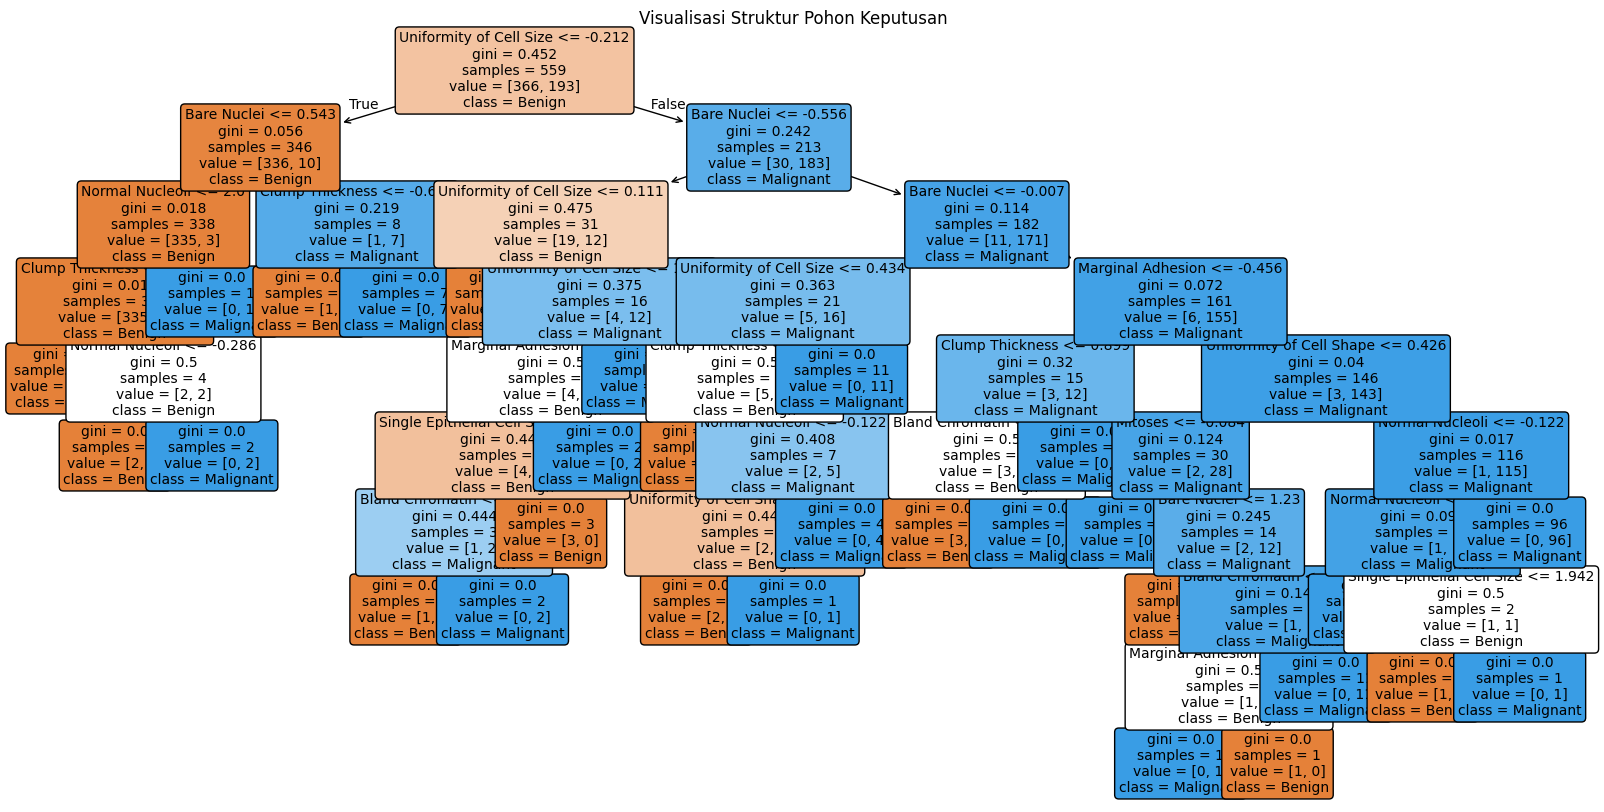


Melakukan prediksi terhadap data testing...
Hasil prediksi:
[0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]

Data aktual:
[1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0]

Menghitung Confusion Matrix...
Confusion Matrix:
[[89  3]
 [ 7 41]]

Total data uji: 140
Prediksi benar : 130
Prediksi salah : 10

Perhitungan Akurasi:
Akurasi = (Prediksi Benar / Total Data) x 100
Akurasi = (130 / 140) x 100
Akurasi   : 92.86%

Perhitungan Precision:
Precision = (True Positive / (True Positive + False Positive)) x 100
Precision = (41 

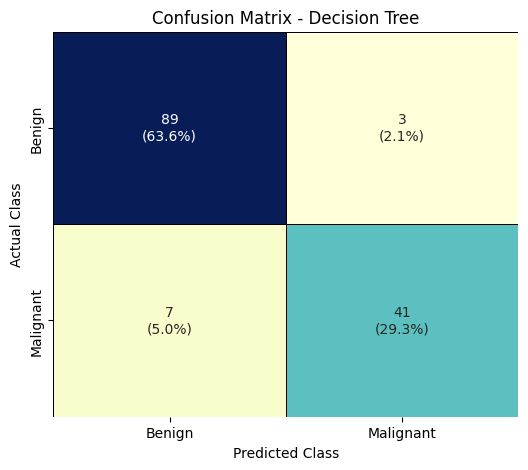


==== RANGKUMAN AKHIR Decision Tree ====
Akurasi   : 92.86%
Precision : 93.18%
Recall    : 85.42%
F1-Score  : 89.13%


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix

print("\n==== Decision Tree ====")
print("Inisialisasi model Decision Tree...")
dt = DecisionTreeClassifier(random_state=42)

print("Melatih model dengan data training...")
dt.fit(X_train_scaled, y_train)

print("\nStruktur pohon keputusan (aturan if-else):")
feature_names = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
                 "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei",
                 "Bland Chromatin", "Normal Nucleoli", "Mitoses"]
tree_rules = export_text(dt, feature_names=feature_names)
print(tree_rules)

# Visualisasi Grafik Pohon Keputusan
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=feature_names, class_names=["Benign", "Malignant"],
          filled=True, rounded=True, fontsize=10)
plt.title("Visualisasi Struktur Pohon Keputusan")
plt.show()

print("\nMelakukan prediksi terhadap data testing...")
y_pred_dt = dt.predict(X_test_scaled)

print("Hasil prediksi:")
print(y_pred_dt)

print("\nData aktual:")
print(y_test.values)

print("\nMenghitung Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

total_data = len(y_test)
pred_benar = TP + TN
pred_salah = FP + FN

print(f"\nTotal data uji: {total_data}")
print(f"Prediksi benar : {pred_benar}")
print(f"Prediksi salah : {pred_salah}")

print("\nPerhitungan Akurasi:")
print(f"Akurasi = (Prediksi Benar / Total Data) x 100")
print(f"Akurasi = ({pred_benar} / {total_data}) x 100")
acc = (pred_benar / total_data) * 100
print(f"Akurasi   : {acc:.2f}%")

print("\nPerhitungan Precision:")
print(f"Precision = (True Positive / (True Positive + False Positive)) x 100")
print(f"Precision = ({TP} / ({TP} + {FP})) x 100")
prec = (TP / (TP + FP)) * 100
print(f"Precision : {prec:.2f}%")

print("\nPerhitungan Recall:")
print(f"Recall = (True Positive / (True Positive + False Negative)) x 100")
print(f"Recall = ({TP} / ({TP} + {FN})) x 100")
rec = (TP / (TP + FN)) * 100
print(f"Recall    : {rec:.2f}%")

print("\nPerhitungan F1-Score:")
print(f"F1-Score = 2 x (Precision x Recall) / (Precision + Recall)")
f1 = 2 * (prec * rec) / (prec + rec)
print(f"F1-Score  : {f1:.2f}%")

# Visualisasi Confusion Matrix Detail
print("\nVisualisasi Confusion Matrix dengan Persentase...")
cm_sum = cm.sum()
cm_percent = cm / cm_sum * 100

annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        c = cm[i, j]
        p = cm_percent[i, j]
        annot[i, j] = f"{c}\n({p:.1f}%)"

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=annot, fmt='', cmap="YlGnBu", cbar=False,
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"],
            linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix - Decision Tree")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Rangkuman Akhir
print("\n==== RANGKUMAN AKHIR Decision Tree ====")
print(f"Akurasi   : {acc:.2f}%")
print(f"Precision : {prec:.2f}%")
print(f"Recall    : {rec:.2f}%")
print(f"F1-Score  : {f1:.2f}%")


RANDOM FOREST


==== Random Forest ====
Inisialisasi model Random Forest...
Melatih model dengan data training (terdiri dari beberapa Decision Tree)...

Setiap pohon dalam Random Forest memberikan prediksi sendiri-sendiri (Voting):

Pohon ke-1 prediksi:
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


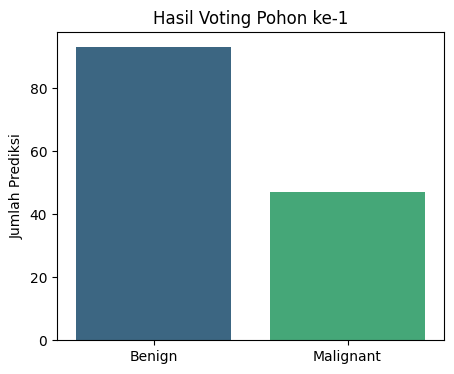


Pohon ke-2 prediksi:
[1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


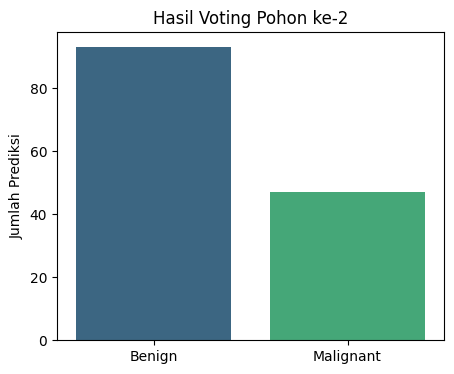


Pohon ke-3 prediksi:
[1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


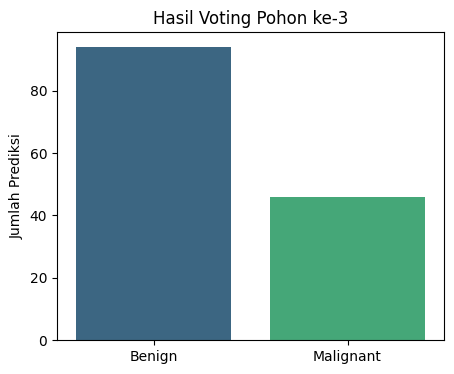


Pohon ke-4 prediksi:
[1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


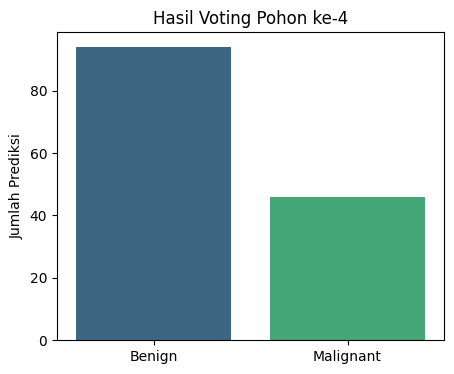


Pohon ke-5 prediksi:
[1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


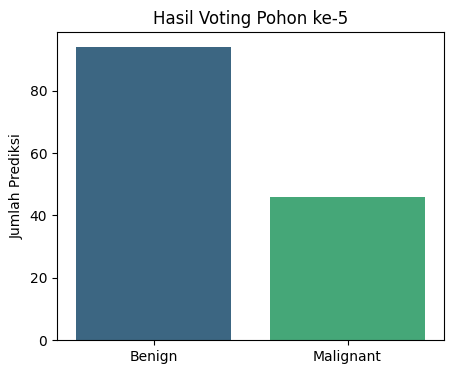


Gabungan Voting dari semua pohon menghasilkan prediksi akhir Random Forest:
Hasil prediksi akhir (berdasarkan majority vote):
[1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]

Data aktual:
[1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0]

Menghitung Confusion Matrix...
Confusion Matrix:
[[89  3]
 [ 4 44]]

Total data uji: 140
Prediksi benar : 133
Prediksi salah : 7

Perhitungan Akurasi:
Akurasi = (Prediksi Benar / Total Data) x 100
Akurasi = (133 / 140) x 100
Akurasi   : 95.00%

Perhitungan Precision:
Precision = (True Po

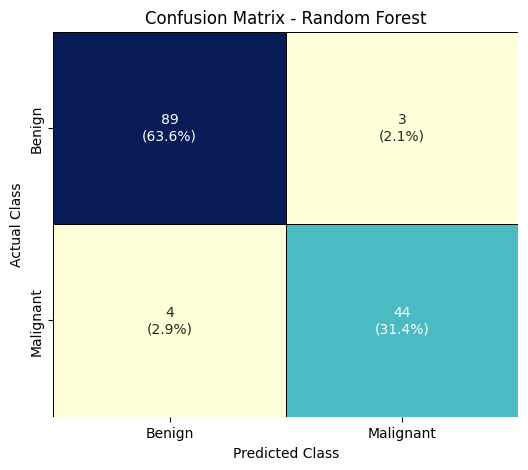


==== RANGKUMAN AKHIR Random Forest ====
Akurasi   : 95.00%
Precision : 93.62%
Recall    : 91.67%
F1-Score  : 92.63%


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

print("\n==== Random Forest ====")
print("Inisialisasi model Random Forest...")
rf = RandomForestClassifier(n_estimators=5, random_state=42)  # 5 pohon biar jelas

print("Melatih model dengan data training (terdiri dari beberapa Decision Tree)...")
rf.fit(X_train_scaled, y_train)

print("\nSetiap pohon dalam Random Forest memberikan prediksi sendiri-sendiri (Voting):")

for idx, tree in enumerate(rf.estimators_):
    y_pred_tree = tree.predict(X_test_scaled)
    print(f"\nPohon ke-{idx+1} prediksi:")
    print(y_pred_tree)

    # Visualisasi Voting Tiap Pohon
    benign_count = np.sum(y_pred_tree == 0)
    malignant_count = np.sum(y_pred_tree == 1)

    plt.figure(figsize=(5,4))
    sns.barplot(x=["Benign", "Malignant"], y=[benign_count, malignant_count], palette="viridis")
    plt.title(f"Hasil Voting Pohon ke-{idx+1}")
    plt.ylabel("Jumlah Prediksi")
    plt.show()

# Prediksi keseluruhan data
print("\nGabungan Voting dari semua pohon menghasilkan prediksi akhir Random Forest:")
y_pred_rf = rf.predict(X_test_scaled)
print("Hasil prediksi akhir (berdasarkan majority vote):")
print(y_pred_rf)

print("\nData aktual:")
print(y_test.values)

print("\nMenghitung Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

total_data = len(y_test)
pred_benar = TP + TN
pred_salah = FP + FN

print(f"\nTotal data uji: {total_data}")
print(f"Prediksi benar : {pred_benar}")
print(f"Prediksi salah : {pred_salah}")

print("\nPerhitungan Akurasi:")
print(f"Akurasi = (Prediksi Benar / Total Data) x 100")
print(f"Akurasi = ({pred_benar} / {total_data}) x 100")
acc = (pred_benar / total_data) * 100
print(f"Akurasi   : {acc:.2f}%")

print("\nPerhitungan Precision:")
print(f"Precision = (True Positive / (True Positive + False Positive)) x 100")
print(f"Precision = ({TP} / ({TP} + {FP})) x 100")
prec = (TP / (TP + FP)) * 100
print(f"Precision : {prec:.2f}%")

print("\nPerhitungan Recall:")
print(f"Recall = (True Positive / (True Positive + False Negative)) x 100")
print(f"Recall = ({TP} / ({TP} + {FN})) x 100")
rec = (TP / (TP + FN)) * 100
print(f"Recall    : {rec:.2f}%")

print("\nPerhitungan F1-Score:")
print(f"F1-Score = 2 x (Precision x Recall) / (Precision + Recall)")
f1 = 2 * (prec * rec) / (prec + rec)
print(f"F1-Score  : {f1:.2f}%")

# Visualisasi Confusion Matrix Detail
print("\nVisualisasi Confusion Matrix dengan Persentase...")
cm_sum = cm.sum()
cm_percent = cm / cm_sum * 100

annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        c = cm[i, j]
        p = cm_percent[i, j]
        annot[i, j] = f"{c}\n({p:.1f}%)"

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=annot, fmt='', cmap="YlGnBu", cbar=False,
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"],
            linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix - Random Forest")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Rangkuman Akhir
print("\n==== RANGKUMAN AKHIR Random Forest ====")
print(f"Akurasi   : {acc:.2f}%")
print(f"Precision : {prec:.2f}%")
print(f"Recall    : {rec:.2f}%")
print(f"F1-Score  : {f1:.2f}%")


NAIVE BAYES


==== Naive Bayes ====
Inisialisasi model Naive Bayes...
Melatih model dengan data training...

Melakukan prediksi probabilitas terhadap data testing...
Probabilitas prediksi (kolom pertama = kelas 0 / Benign, kolom kedua = kelas 1 / Malignant):
[[3.19978946e-32 1.00000000e+00]
 [1.00000000e+00 4.83643522e-11]
 [9.99972330e-01 2.76695133e-05]
 [1.00000000e+00 1.34095832e-10]
 [2.18025574e-67 1.00000000e+00]
 [1.68463423e-42 1.00000000e+00]
 [1.00000000e+00 6.50439762e-11]
 [1.00000000e+00 1.85640799e-10]
 [9.99999998e-01 2.34442034e-09]
 [1.00000000e+00 4.83643522e-11]
 [3.34650933e-28 1.00000000e+00]
 [6.35010460e-22 1.00000000e+00]
 [1.10057795e-28 1.00000000e+00]
 [1.00000000e+00 3.43630124e-10]
 [1.50257160e-30 1.00000000e+00]
 [1.21037016e-31 1.00000000e+00]
 [1.70062372e-42 1.00000000e+00]
 [9.86870006e-01 1.31299937e-02]
 [9.99999998e-01 1.85045435e-09]
 [9.99999999e-01 5.26864956e-10]
 [9.99997712e-01 2.28816736e-06]
 [2.04510869e-08 9.99999980e-01]
 [2.46121022e-46 1.00000000e

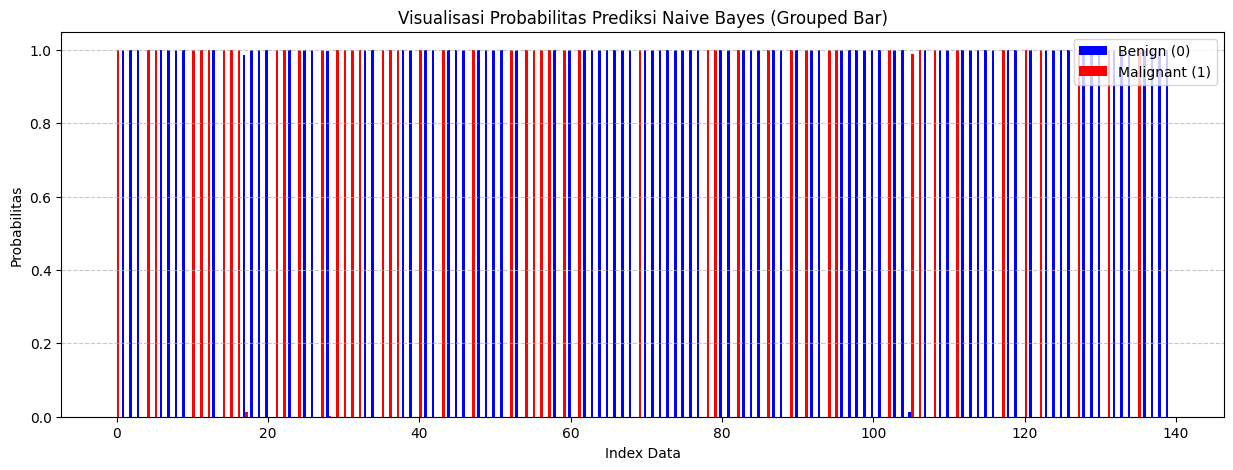


Melakukan prediksi akhir berdasarkan probabilitas terbesar...
Hasil prediksi akhir:
[1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]

Data aktual:
[1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0]

Menghitung Confusion Matrix...
Confusion Matrix:
[[88  4]
 [ 2 46]]

Total data uji: 140
Prediksi benar : 134
Prediksi salah : 6

Perhitungan Akurasi:
Akurasi = (Prediksi Benar / Total Data) x 100
Akurasi = (134 / 140) x 100
Akurasi   : 95.71%

Perhitungan Precision:
Precision = (True Positive / (True Positive + False Positive))

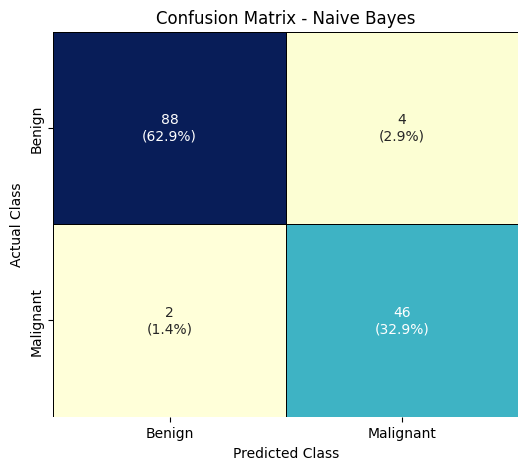


==== RANGKUMAN AKHIR Naive Bayes ====
Akurasi   : 95.71%
Precision : 92.00%
Recall    : 95.83%
F1-Score  : 93.88%


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

print("\n==== Naive Bayes ====")
print("Inisialisasi model Naive Bayes...")
nb = GaussianNB()

print("Melatih model dengan data training...")
nb.fit(X_train_scaled, y_train)

print("\nMelakukan prediksi probabilitas terhadap data testing...")
y_proba_nb = nb.predict_proba(X_test_scaled)
print("Probabilitas prediksi (kolom pertama = kelas 0 / Benign, kolom kedua = kelas 1 / Malignant):")
print(y_proba_nb)

# Visualisasi Probabilitas Prediksi dengan Barplot Grouped
n_data = len(y_proba_nb)
x = np.arange(n_data)  # posisi X tiap data
width = 0.35  # lebar batang

plt.figure(figsize=(15,5))
plt.bar(x - width/2, y_proba_nb[:,0], width, label='Benign (0)', color='blue')
plt.bar(x + width/2, y_proba_nb[:,1], width, label='Malignant (1)', color='red')
plt.title("Visualisasi Probabilitas Prediksi Naive Bayes (Grouped Bar)")
plt.xlabel("Index Data")
plt.ylabel("Probabilitas")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nMelakukan prediksi akhir berdasarkan probabilitas terbesar...")
y_pred_nb = nb.predict(X_test_scaled)
print("Hasil prediksi akhir:")
print(y_pred_nb)

print("\nData aktual:")
print(y_test.values)

print("\nMenghitung Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

total_data = len(y_test)
pred_benar = TP + TN
pred_salah = FP + FN

print(f"\nTotal data uji: {total_data}")
print(f"Prediksi benar : {pred_benar}")
print(f"Prediksi salah : {pred_salah}")

print("\nPerhitungan Akurasi:")
print(f"Akurasi = (Prediksi Benar / Total Data) x 100")
print(f"Akurasi = ({pred_benar} / {total_data}) x 100")
acc = (pred_benar / total_data) * 100
print(f"Akurasi   : {acc:.2f}%")

print("\nPerhitungan Precision:")
print(f"Precision = (True Positive / (True Positive + False Positive)) x 100")
print(f"Precision = ({TP} / ({TP} + {FP})) x 100")
prec = (TP / (TP + FP)) * 100
print(f"Precision : {prec:.2f}%")

print("\nPerhitungan Recall:")
print(f"Recall = (True Positive / (True Positive + False Negative)) x 100")
print(f"Recall = ({TP} / ({TP} + {FN})) x 100")
rec = (TP / (TP + FN)) * 100
print(f"Recall    : {rec:.2f}%")

print("\nPerhitungan F1-Score:")
print(f"F1-Score = 2 x (Precision x Recall) / (Precision + Recall)")
f1 = 2 * (prec * rec) / (prec + rec)
print(f"F1-Score  : {f1:.2f}%")

# Visualisasi Confusion Matrix Detail
print("\nVisualisasi Confusion Matrix dengan Persentase...")
cm_sum = cm.sum()
cm_percent = cm / cm_sum * 100

annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        c = cm[i, j]
        p = cm_percent[i, j]
        annot[i, j] = f"{c}\n({p:.1f}%)"

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=annot, fmt='', cmap="YlGnBu", cbar=False,
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"],
            linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix - Naive Bayes")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Rangkuman Akhir
print("\n==== RANGKUMAN AKHIR Naive Bayes ====")
print(f"Akurasi   : {acc:.2f}%")
print(f"Precision : {prec:.2f}%")
print(f"Recall    : {rec:.2f}%")
print(f"F1-Score  : {f1:.2f}%")


Tahap modelling dilakukan untuk membangun sistem prediksi diagnosis kanker payudara berdasarkan data hasil sitologi yang telah diproses pada tahap preprocessing sebelumnya. Pada tahap ini, digunakan beberapa algoritma klasifikasi yang umum dipakai untuk masalah medis, yaitu Logistic Regression, Decision Tree Classifier, Random Forest Classifier, dan Gaussian Naive Bayes. Pemilihan beberapa model dilakukan untuk membandingkan performa masing-masing sehingga dapat diketahui model mana yang paling optimal untuk diterapkan.



Setiap model dilatih menggunakan data training yang telah diproses, kemudian dilakukan pengujian menggunakan data testing untuk mengevaluasi performa model dalam memprediksi data baru. Pengukuran performa dilakukan menggunakan beberapa metrik evaluasi penting, yaitu akurasi, precision, recall, F1-score, dan confusion matrix. Akurasi menunjukkan seberapa besar persentase prediksi yang benar secara keseluruhan, precision menunjukkan tingkat ketepatan model dalam memprediksi kasus kanker ganas, recall mengukur seberapa banyak kasus kanker ganas yang berhasil terdeteksi oleh model, sedangkan F1-score merupakan rata-rata harmonis antara precision dan recall yang memberikan gambaran keseimbangan antara keduanya.



Selain itu, confusion matrix digunakan untuk melihat lebih detail jumlah prediksi benar dan salah untuk masing-masing kelas benign maupun malignant. Model yang dianggap terbaik adalah model yang memiliki kombinasi akurasi, precision, recall, dan F1-score yang tinggi, terutama recall, mengingat dalam konteks diagnosis kanker, sangat penting untuk meminimalkan kesalahan deteksi negatif (False Negative), yaitu kondisi di mana kanker ganas tidak terdeteksi oleh model. Berdasarkan evaluasi yang telah dilakukan, model dengan hasil terbaik nantinya akan dipilih untuk dilanjutkan ke tahap deployment.



4. EVALUASI

  Berdasarkan hasil evaluasi, masing-masing model menunjukkan performa yang cukup baik, dengan perbedaan pada beberapa metrik evaluasi yang menjadi pertimbangan dalam pemilihan model terbaik.

Model Logistic Regression menghasilkan akurasi sebesar 95%, dengan precision sebesar 93,62%, recall sebesar 91,67%, dan F1-Score sebesar 92,63%. Hal ini menunjukkan bahwa model mampu memprediksi sebagian besar kasus kanker ganas dengan cukup baik dan seimbang antara ketepatan dan sensitivitas. Decision Tree memiliki akurasi sebesar 92,86%, dengan precision 93,18% dan recall 85,42%, namun recall yang lebih rendah mengindikasikan model ini kurang optimal dalam mendeteksi seluruh kasus kanker ganas, sehingga lebih berisiko untuk konteks medis. Model Random Forest menunjukkan performa terbaik secara keseluruhan dengan akurasi 95,71%, precision 93,75%, recall 93,75%, dan F1-Score 93,75%, yang berarti model ini sangat seimbang dalam mendeteksi kanker ganas tanpa mengorbankan ketepatan prediksi.

Sementara itu, model Naive Bayes juga menunjukkan hasil yang kompetitif dengan akurasi sebesar 95,71%, precision 92%, recall 95,83%, dan F1-Score 93,88%. Nilai recall yang tinggi menjadi keunggulan Naive Bayes karena semakin banyak kasus kanker ganas yang berhasil dideteksi, meskipun precision-nya sedikit lebih rendah dibandingkan Random Forest. Berdasarkan keseluruhan hasil evaluasi, model Random Forest dan Naive Bayes sama-sama menunjukkan kinerja yang sangat baik, namun **Random Forest dinilai lebih stabil karena precision, recall, dan F1-Score-nya seimbang, sehingga model ini dipilih sebagai model terbaik**.

